In [64]:
%load_ext autoreload
%autoreload 2

from matplotlib import dates
from pandas import DataFrame
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quantstats as qs
import talib.abstract as ta
import os
import time
import inspect
import wandb
import logging

PATH_MOUNT = Path.cwd().parent / "mount"
logger = logging.getLogger("wandb")
logger.setLevel(logging.ERROR)
qs.extend_pandas()
plt.style.use("seaborn-whitegrid")

if "freqtrade" not in os.listdir():
    os.chdir("..")
    import nest_asyncio
    nest_asyncio.apply()

print("Working Directory:", os.getcwd())

# Freqtrade Imports
from freqtrade.optimize.optimize_reports import text_table_add_metrics
from freqtrade.nbtools.preset import Preset
from freqtrade.nbtools import plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Working Directory: C:\CS\Python\crypto-collection\freqtrade\superft


In [5]:
PATH_LOCAL_PRESET = PATH_MOUNT / "presets" / "15m-next30m-combine"
PATH_LOCAL_DATADIR = PATH_MOUNT / "data" / "binance"
TIMERANGE = "20210501-20210601"

# Start Backtesting Logic
preset_local, strategy_code = Preset.from_local(PATH_LOCAL_PRESET)
preset_local.datadir = PATH_LOCAL_DATADIR
preset_local.timerange = TIMERANGE
stats, summary = preset_local.backtest_by_default_strategy_code()
trades = pd.DataFrame(stats["strategy"]["NotebookStrategy"]["trades"])
print("Backtest done! Data is ready to be analyzed.")

wandb: Downloading large artifact 15m-next30m-spot-v2_new.pkl:latest, 60.08MB. 1 files... Done. 0:0:0


wandb: Adding directory to artifact (.\.temp\15m-next30m-combine__backtest-2021-07-14_13-24-43)... Done. 0.0s


You are backtesting a local preset `C:\CS\Python\crypto-collection\freqtrade\mount\presets\15m-next30m-combine`
Keep in mind that this will update backtest results (such as metadata.json, exports)
But if you modified the strategy from notebook, it will not update the local strategy file.
Result for strategy NotebookStrategy
=========================================================== BACKTESTING REPORT ==========================================================
|       Pair |   Buys |   Avg Profit % |   Cum Profit % |   Tot Profit USDT |   Tot Profit % |   Avg Duration |   Win  Draw  Loss  Win% |
|------------+--------+----------------+----------------+-------------------+----------------+----------------+-------------------------|
|   DOT/USDT |     20 |           3.13 |          62.58 |             9.396 |           0.94 |        0:30:00 |    12     0     8  60.0 |
|   ADA/USDT |     19 |           2.64 |          50.09 |             7.521 |           0.75 |        0:30:00 |    16     

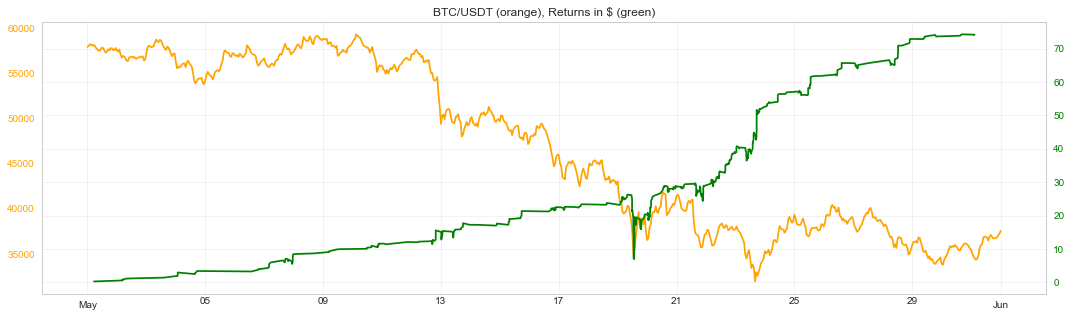

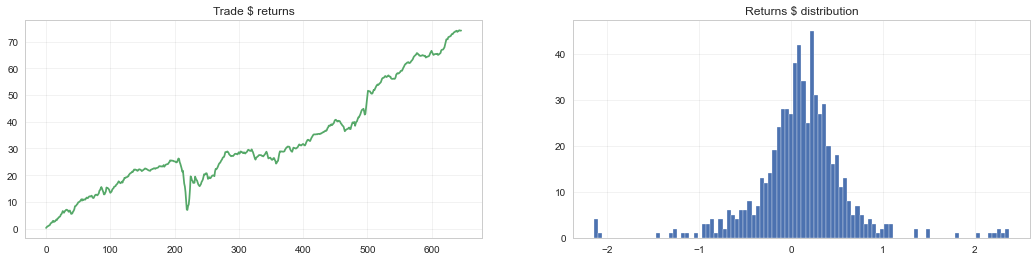

Portfolio Summary
------------------------------
Min Balance          : 0.27
Max Balance          : 74.24
End Balance          : 74.12
------------------------------
Trades               : 647
Avg. Profit $        : 0.11
Biggest Profit $     : 4.78
Biggest Loss $       : -3.36
------------------------------
Sharpe               : 2.55


In [27]:
plotting.plot_profits(
    trades,
    start = "2021-05-01",
    end = "2021-06-01",
    path_mount = PATH_MOUNT
)

In [82]:
# Running this cell will print backtest results
results = stats["strategy"]["NotebookStrategy"]

# Results per pair
results_per_pair = pd.DataFrame(results["results_per_pair"])
results_per_pair_df = results_per_pair.set_index("key").drop(columns=["profit_mean", "profit_total"])
results_per_pair_df = results_per_pair_df.sort_values(by=["profit_total_pct"], ascending=False)
results_per_pair_df.round(2)

# Sell reason stats
sells = pd.DataFrame(results['sell_reason_summary'])
sells = sells.drop(columns=["profit_mean", "profit_total"]).set_index("sell_reason")

# Left open trades
left_open_trades = pd.DataFrame(results['left_open_trades'])
left_open_trades = left_open_trades.drop(columns=["profit_mean", "profit_total"]).set_index("key")

# Summary metrics
metrics = text_table_add_metrics(results)

print("Results Per Pair")
display(results_per_pair_df.round(2))
print("Sell Reasons")
display(sells.round(2))
print("Left Open Trades")
display(left_open_trades.round(2))
print("Summary")
print("=" * 48 + "\n" + metrics + "\n" + "=" * 48)

Results Per Pair


,trades,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,,
TOTAL,647,0.76,4.94,493.65,74.12,7.41,0:30:00,418,0,229
DOT/USDT,20,3.13,0.63,62.58,9.40,0.94,0:30:00,12,0,8
ADA/USDT,19,2.64,0.50,50.09,7.52,0.75,0:30:00,16,0,3
THETA/USDT,12,2.75,0.33,32.99,4.95,0.50,0:30:00,11,0,1
QTUM/USDT,19,1.38,0.26,26.31,3.95,0.40,0:30:00,13,0,6
MANA/USDT,6,4.08,0.24,24.46,3.67,0.37,0:30:00,5,0,1
VET/USDT,19,1.13,0.21,21.44,3.22,0.32,0:30:00,13,0,6
KSM/USDT,26,0.79,0.20,20.49,3.08,0.31,0:30:00,15,0,11
MKR/USDT,26,0.72,0.19,18.76,2.82,0.28,0:30:00,19,0,7


Sell Reasons


,trades,wins,draws,losses,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct
sell_reason,,,,,,,,,
roi,647,418,0,229,0.76,4.94,493.65,74.12,82.27


Left Open Trades


,trades,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,,
TOTAL,0,0.0,0.0,0.0,0.0,0.0,0:00,0,0,0


Summary
| Metric                 | Value               |
|------------------------+---------------------|
| Backtesting from       | 2021-05-01 00:00:00 |
| Backtesting to         | 2021-06-01 00:00:00 |
| Max open trades        | 6                   |
|                        |                     |
| Total/Daily Avg Trades | 647 / 20.87         |
| Starting balance       | 1000.000 USDT       |
| Final balance          | 1074.121 USDT       |
| Absolute profit        | 74.121 USDT         |
| Total profit %         | 7.41%               |
| Avg. stake amount      | 15.000 USDT         |
| Total trade volume     | 9705.000 USDT       |
|                        |                     |
| Best Pair              | DOT/USDT 62.58%     |
| Worst Pair             | LINK/USDT -16.01%   |
| Best trade             | DOT/USDT 31.85%     |
| Worst trade            | UNI/USDT -22.39%    |
| Best day               | 13.632 USDT         |
| Worst day              | -3.420 USDT         |
| Days win/d